# Comment Analysis

Data prepration 

In [1]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
import spacy
import numpy as np

In [2]:
from spacy.lang.en.stop_words import STOP_WORDS
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
from sklearn import preprocessing
from sklearn import metrics
from itertools import cycle, islice
from pandas.plotting import parallel_coordinates
from numpy import unique
from numpy import where
from sklearn.cluster import AffinityPropagation

In [3]:
import os
os.chdir('D:\\OneDrive\\OneDrive - Queensland University of Technology\\QUT\\2022\\Semester 2\\IFN704\\Data\\')

In [4]:
pd.set_option('display.max_rows', None)

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
dataframe = pd.read_xml('19961.xml.notext')

In [7]:
dataframe.head(20)

,title,ns,id,timestamp,contributor,comment,model,format,sha1,parentid,minor
0,Manchester United F.C.,NaN,NaN,None,NaN,None,None,None,None,NaN,NaN
1,None,0.0,NaN,None,NaN,None,None,None,None,NaN,NaN
2,None,NaN,19961.0,None,NaN,None,None,None,None,NaN,NaN
3,None,NaN,NaN,2001-09-28T15:39:23Z,NaN,Much as I appreciated the original sentiment ...,wikitext,text/x-wiki,jb44elzzifshnsnobqihpgjw7fx4vjn,NaN,NaN
4,None,NaN,NaN,2001-10-07T17:11:40Z,NaN,*,wikitext,text/x-wiki,lk5zbpmrq1wmv9w666aqf0ugpu329ai,267492.0,NaN
5,None,NaN,NaN,2002-02-25T15:51:15Z,NaN,Automated conversion,wikitext,text/x-wiki,bkwfdqritffxqhqaq8kwb2jt19mzqgt,267493.0,NaN
6,None,NaN,NaN,2002-12-13T11:25:44Z,NaN,None,wikitext,text/x-wiki,mxzlk32te4t4odtqc6r31ff4s6vn2z7,488872.0,NaN
7,None,NaN,NaN,2003-02-01T16:34:58Z,NaN,None,wikitext,text/x-wiki,3v7zhf7wtks0p090w3ufze5kc7lh590,635638.0,NaN
8,None,NaN,NaN,2003-02-02T11:19:24Z,NaN,+trophies & external link,wikitext,text/x-wiki,2zzlmag8puwrycq8y3nlwh3cgubkoqv,637841.0,NaN
9,None,NaN,NaN,2003-02-02T18:39:31Z,NaN,made the list of trophies tidier,wikitext,text/x-wiki,reva2it8pyuy5sx05dxy88aa9d6mlzf,638512.0,NaN


In [8]:
print(dataframe['format'].unique())

[None 'text/x-wiki']


In [9]:
print(dataframe['id'].unique())

[   nan 19961.]


In [10]:
print(dataframe['ns'].unique())

[nan  0.]


In [11]:
len(dataframe['comment'].unique())

8213

In [12]:
print(dataframe['contributor'].unique())

[nan]


In [13]:
dataframe.drop(['minor','contributor'], axis=1, inplace=True)

In [14]:
dataframe.drop(['model','format'], axis=1, inplace=True)

In [15]:
dataframe.drop(['id'], axis=1, inplace=True)

In [16]:
dataframe.drop(['sha1','timestamp','ns','title'], axis=1, inplace=True)

In [17]:
dataframe.head(20)

,comment,parentid
0,None,NaN
1,None,NaN
2,None,NaN
3,Much as I appreciated the original sentiment ...,NaN
4,*,267492.0
5,Automated conversion,267493.0
6,None,488872.0
7,None,635638.0
8,+trophies & external link,637841.0
9,made the list of trophies tidier,638512.0


## NLP Preprocessing 

In [18]:
nlp = spacy.load("en_core_web_sm")

In [19]:
cnt = Counter()
import string
punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~+'''
def get_bag(comment):
    filtered_sentence = []
    comment = nlp(comment)
    for word in comment:
      word = str(word)
      if word not in STOP_WORDS and word not in punctuations and word.isdigit() is False:
          filtered_sentence.append(word)      
    return filtered_sentence

In [20]:
comments = dataframe.comment
b = []
for comment in comments:
  if comment != None:
    a = get_bag(comment)
    if len(a):
      if len(a[0])>3:
        b.append(a[0])
      else:
        b.append(None)
    else:
      b.append(None)
  else:
      b.append(None)

In [21]:
dataframe.insert(loc=1, column='target_comment', value=b)

In [22]:
dataframe.head(100)

,comment,target_comment,parentid
0,None,None,NaN
1,None,None,NaN
2,None,None,NaN
3,Much as I appreciated the original sentiment ...,Much,NaN
4,*,None,267492.0
5,Automated conversion,Automated,267493.0
6,None,None,488872.0
7,None,None,635638.0
8,+trophies & external link,trophies,637841.0
9,made the list of trophies tidier,list,638512.0


In [22]:
dataframe = dataframe.dropna()

In [49]:
dataframe.head(100)

,target_comment,parentid
5,47,267493.0
8,1050,637841.0
9,803,638512.0
12,800,688429.0
14,24,734569.0
...,...,...
208,186,6787797.0
209,178,6787822.0
210,178,6787830.0
211,127,6804614.0


In [24]:
len(dataframe)

13101

In [25]:
len(dataframe['target_comment'].unique())

1103

In [26]:
# Label Encoding 

le = preprocessing.LabelEncoder()
dataframe['target_comment'] = le.fit_transform(dataframe.target_comment.values)

In [56]:
dataframe.head()

,target_comment,parentid
5,47,267493.0
8,1050,637841.0
9,803,638512.0
12,800,688429.0
14,24,734569.0


In [28]:
dataframe.drop(['comment'], axis=1, inplace=True)

In [29]:
dataframe.head()

,target_comment,parentid
5,47,267493.0
8,1050,637841.0
9,803,638512.0
12,800,688429.0
14,24,734569.0


In [30]:
# Standardizing the data  

X = StandardScaler().fit_transform(dataframe)

In [31]:
print(X)

[[-1.24040348 -1.19249381]
 [ 3.02969051 -1.19125868]
 [ 1.97813197 -1.19125644]
 ...
 [ 0.16451279  2.3724265 ]
 [ 0.33906299  2.37242681]
 [ 0.33906299  2.37243649]]


## KMeans Clustering 

In [32]:
k_means = KMeans(n_clusters=12)

In [33]:
model = k_means.fit(X)

In [34]:
pred = k_means.predict(X)

In [35]:
pred

array([ 1, 10,  2, ...,  3,  3,  3])

In [36]:
sum_of_squared_distances = []
K = range(1,15)
for k in K:
    k_means = KMeans(n_clusters=k)
    model = k_means.fit(X)
    sum_of_squared_distances.append(k_means.inertia_)

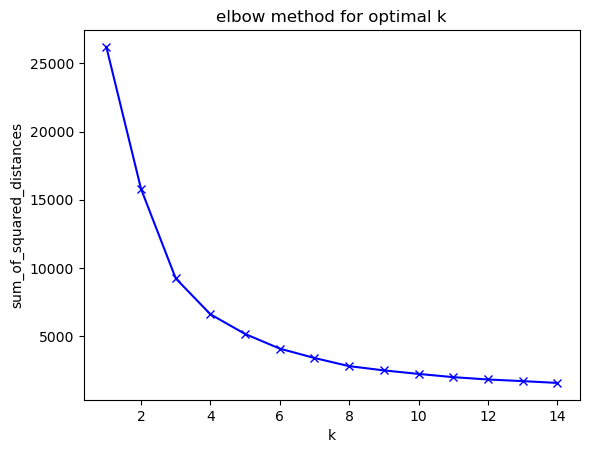

In [37]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('elbow method for optimal k')
plt.show()

In [38]:
centers = model.cluster_centers_
centers

array([[-0.58269573, -0.00881387],
       [ 2.59967446,  0.2470751 ],
       [-0.66709524,  1.84048185],
       [-0.17222735, -0.89322367],
       [ 0.42062161,  0.02166987],
       [ 0.42708193, -0.89961155],
       [ 0.57195717,  1.92197451],
       [ 2.61720684, -0.79480693],
       [-1.16159996, -0.097456  ],
       [ 0.67700398,  0.98797902],
       [ 2.44025008,  1.64280397],
       [-0.85831318, -0.90507917],
       [-0.6321814 ,  0.88282566],
       [ 1.43938626, -0.37727619]])

In [39]:
cols_of_interest = ['target_comment','parentid']

In [40]:
def pd_centers(cols_of_interest, centers):
        colNames = list(cols_of_interest)
        colNames.append('prediction')
        
        # Zip with a column called 'prediction' (index)
        Z = [np.append(A, index) for index, A in enumerate(centers)]
    
        # Convert to pandas data frame for plotting
        P = pd.DataFrame(Z, columns=colNames)
        P['prediction'] = P['prediction'].astype(int)
        return P

In [41]:
P = pd_centers(cols_of_interest, centers)

In [42]:
P

,target_comment,parentid,prediction
0,-0.582696,-0.008814,0
1,2.599674,0.247075,1
2,-0.667095,1.840482,2
3,-0.172227,-0.893224,3
4,0.420622,0.021670,4
5,0.427082,-0.899612,5
6,0.571957,1.921975,6
7,2.617207,-0.794807,7
8,-1.161600,-0.097456,8
9,0.677004,0.987979,9


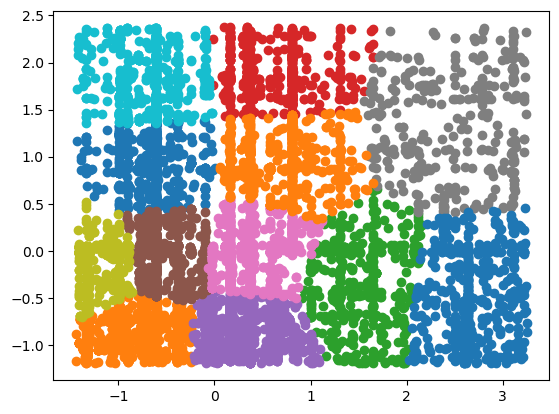

In [43]:
import matplotlib.pyplot as plt
clusters = unique(pred)
for cluster in clusters:
    # get data points that fall in this cluster
    index = where(pred == cluster)
    # make the plot
    plt.scatter(X[index, 0], X[index, 1])

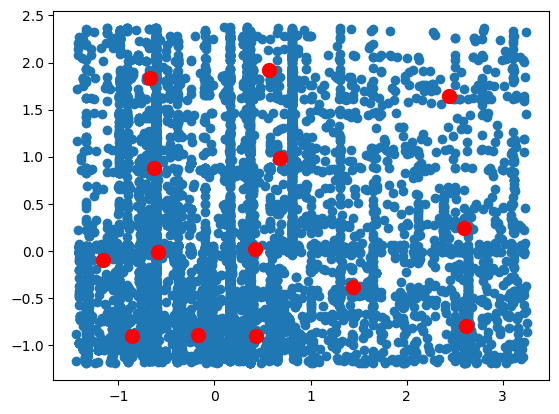

In [44]:
# Plot the data
plt.scatter(X[:,0], 
            X[:,1])

# Plot the clusters 
plt.scatter(k_means.cluster_centers_[:, 0], 
            k_means.cluster_centers_[:, 1], 
            s=100,                             
            c='red')                           
plt.show()

In [45]:
labels = k_means.labels_
metrics.silhouette_score(X, labels, metric = 'euclidean')

0.42755404525292523

In [46]:
metrics.calinski_harabasz_score(X, labels)

15762.033567933844

# AffinityPropagation Clustering 

In [47]:
affinity_propagation = AffinityPropagation()